In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### Import cars.csv dataset

In [78]:
df = pd.read_csv('cars.csv')

In [79]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


### Data Understanding

In [80]:
# Get all details about each features of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.2+ KB


In [81]:
# Get the total counts of rows and columns of dataset
df.shape

(205, 15)

In [82]:
# Get the total values of dataset
df.size

3075

In [83]:
# Check null or missing values
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [84]:
# Check duplicate values
df.duplicated().sum()

0

In [85]:
# Descriptive Analysis
df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


### What you understand by your Data?
#### i) Dataset contain 205 rows and 15 coulmns.
#### ii) Total size of dataset is 3075.
#### iii) normalized-losses and horsepower features need to manipulate in numeric format because of some reason both columns in object datatype.
#### iv) Descriptive status is fine. After data manipulation we need to check descriptive status again.
#### v) There is no duplicate rows and coulmns

### Data Manipulation

#### Perform manipulation on normalized-losses and horsepower features

In [86]:
# Find unique values
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [87]:
# Missing value replaced with nan value
df['normalized-losses'].replace('?',np.nan,inplace = True)

In [88]:
df['normalized-losses'].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [89]:
# Transform given feature datatype object into float
df['normalized-losses']=df['normalized-losses'].astype('float')

In [90]:
df['normalized-losses'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: normalized-losses
Non-Null Count  Dtype  
--------------  -----  
164 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [91]:
# Check null values in normalized-losses. Count of null values is more so here imputation is required
df['normalized-losses'].isnull().sum()

41

In [92]:
# Less chances of outliers so impute mean value
df.describe()

,symboling,normalized-losses,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,35.442168,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,65.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,115.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,150.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [93]:
# Perform imputation by inserting mean values in place of nan
mean_value = df['normalized-losses'].mean()
df['normalized-losses'].fillna(mean_value,inplace = True)

In [94]:
df['normalized-losses'].unique()

array([122., 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
       115.,  93., 142., 161., 153., 125., 128., 103., 168., 108., 194.,
       231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,  91.,
       134.,  65., 197.,  90.,  94., 256.,  95.])

In [95]:
df['normalized-losses'].isnull().sum()

0

In [96]:
# Find unique values
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [97]:
# Missing value replaced with nan value
df['horsepower'].replace('?',np.nan,inplace = True)

In [98]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', nan, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [99]:
# Transform given feature datatype object into float
df['horsepower']=df['horsepower'].astype('float')

In [100]:
df['horsepower'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: horsepower
Non-Null Count  Dtype  
--------------  -----  
203 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [101]:
# Check null values in horsepower. Count of null values is less, so here drop that rows instead performing imputation
df['horsepower'].isnull().sum()

2

In [102]:
df.dropna(inplace = True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    int64  
 1   normalized-losses  203 non-null    float64
 2   make               203 non-null    object 
 3   fuel-type          203 non-null    object 
 4   body-style         203 non-null    object 
 5   drive-wheels       203 non-null    object 
 6   engine-location    203 non-null    object 
 7   width              203 non-null    float64
 8   height             203 non-null    float64
 9   engine-type        203 non-null    object 
 10  engine-size        203 non-null    int64  
 11  horsepower         203 non-null    float64
 12  city-mpg           203 non-null    int64  
 13  highway-mpg        203 non-null    int64  
 14  price              203 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 25.4+ KB


In [104]:
df['horsepower'].isnull().sum()

0

In [105]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


In [106]:
# Split dataset in numerical and categorical
df_categorical_data = df.select_dtypes('object')
df_numerical_data = df.select_dtypes(include = ['int','float'])

In [107]:
df_categorical_data

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


In [108]:
df_numerical_data

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


In [109]:
# Transform Categorical variables into numerical values
for col in df_categorical_data:
    le = LabelEncoder()
    df_categorical_data[col] = le.fit_transform(df_categorical_data[col])

In [110]:
df_categorical_data

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,20,1,3,2,0,3
201,20,1,3,2,0,3
202,20,1,3,2,0,5
203,20,0,3,2,0,3


In [111]:
# Combine Categorical and Numerical data
df_new_dataset = pd.concat([df_categorical_data,df_numerical_data],axis = 1)

In [112]:
df_new_dataset.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22,17450


### Data Visualization

In [113]:
# Find relationships between dependent and independent features
corr = df_new_dataset.corr()

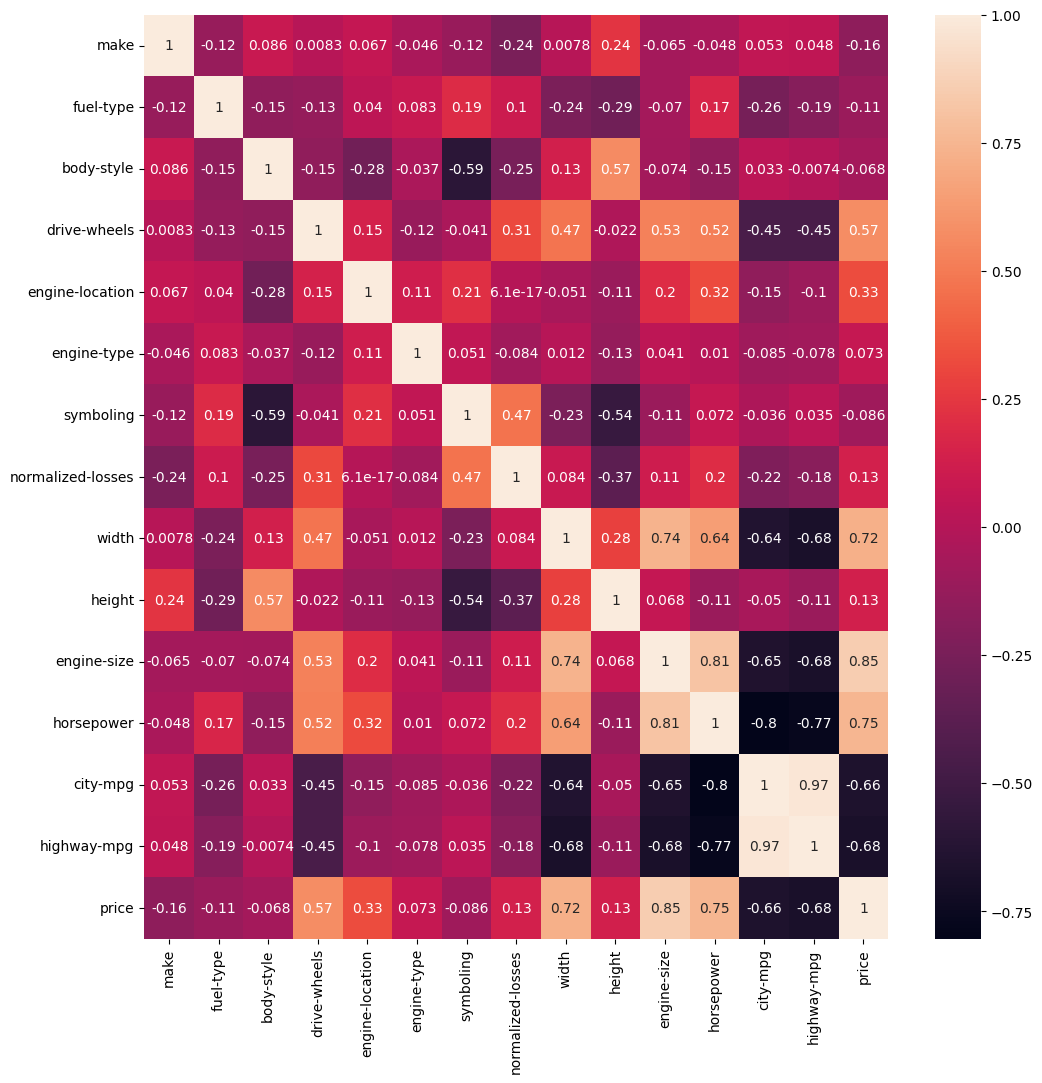

In [114]:
# Find relationships between dependent and independent features
corr = df_new_dataset.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr,annot = True)
plt.show()

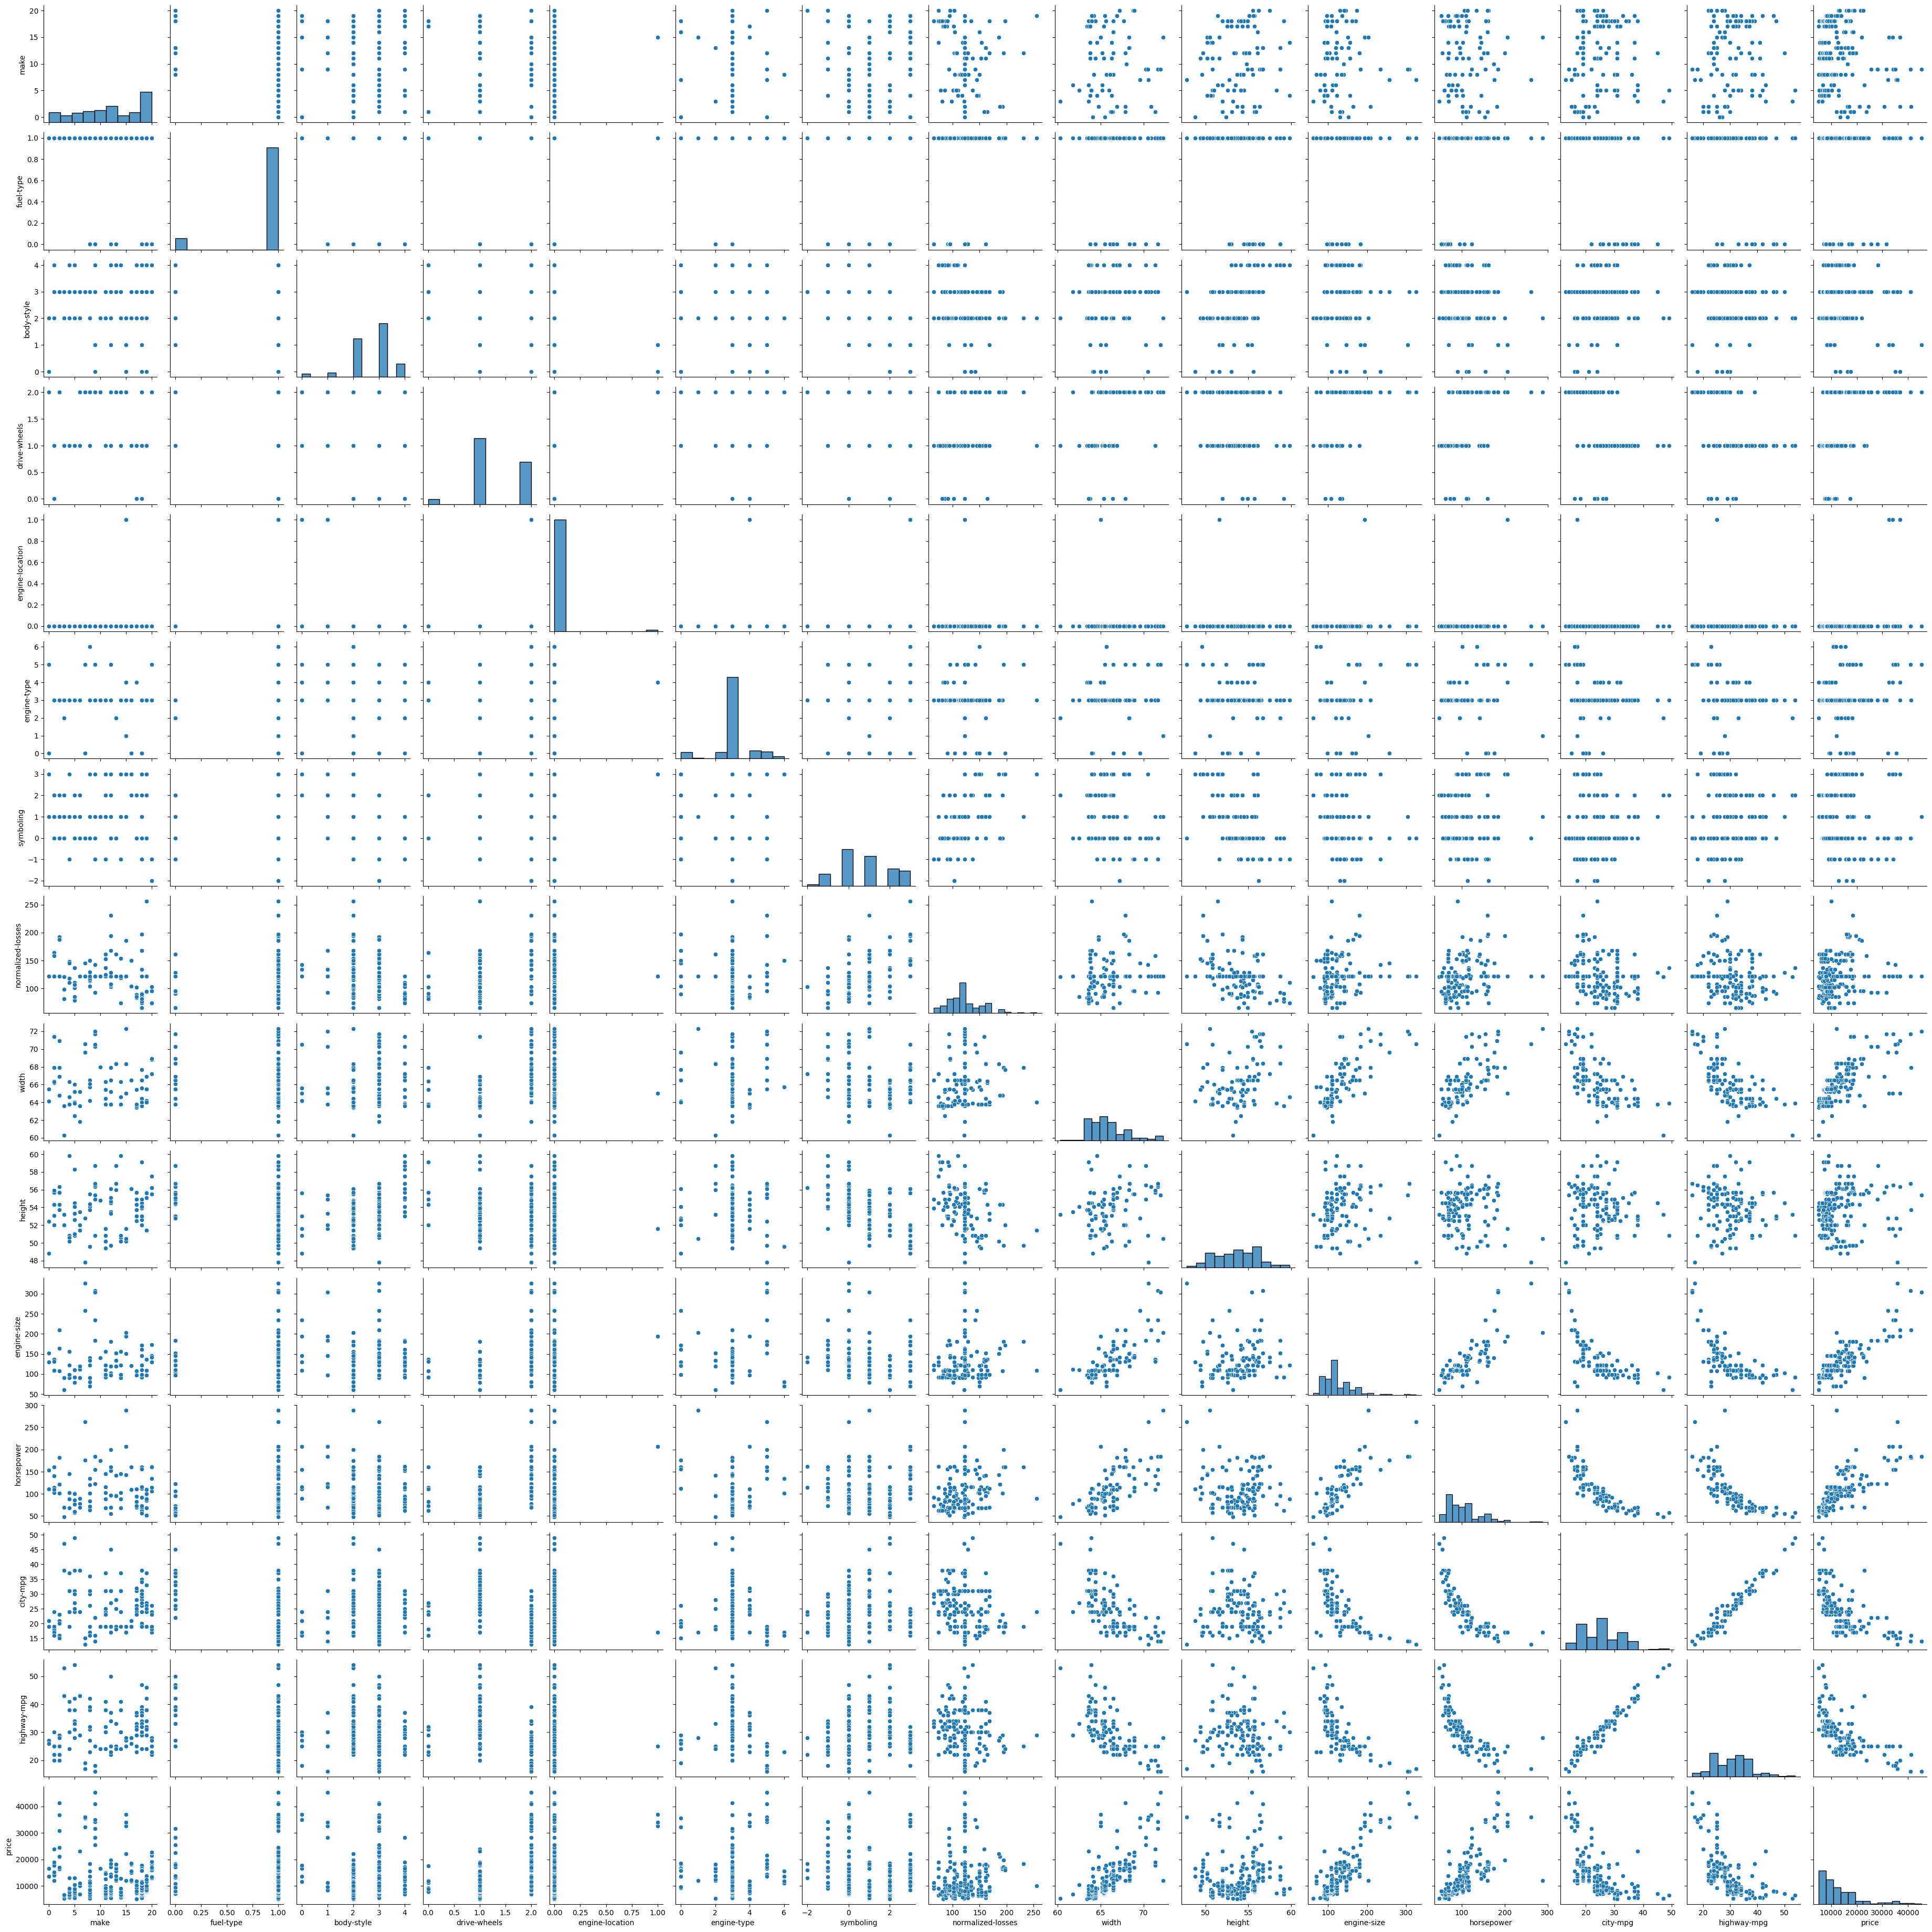

In [115]:
sns.pairplot(df_new_dataset)
plt.show()

In [116]:
df_new_dataset.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22,17450


### Steps Before Applying Machine Learning Model

In [117]:
# Split data into dependent and independent variables
x = df_new_dataset.drop(df[['symboling','engine-type','body-style','price','normalized-losses','height']],axis = 'columns')
y = df_new_dataset['price']

In [118]:
x

,make,fuel-type,drive-wheels,engine-location,width,engine-size,horsepower,city-mpg,highway-mpg
0,0,1,2,0,64.1,130,111.0,21,27
1,0,1,2,0,64.1,130,111.0,21,27
2,0,1,2,0,65.5,152,154.0,19,26
3,1,1,1,0,66.2,109,102.0,24,30
4,1,1,0,0,66.4,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...
200,20,1,2,0,68.9,141,114.0,23,28
201,20,1,2,0,68.8,141,160.0,19,25
202,20,1,2,0,68.9,173,134.0,18,23
203,20,0,2,0,68.9,145,106.0,26,27


In [119]:
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 203, dtype: int64

In [120]:
# To improve model performance perform feature scaling on independent varibles
for col in x:
    ss = StandardScaler()
    x[col] = ss.fit_transform(x[[col]])

In [121]:
x

,make,fuel-type,drive-wheels,engine-location,width,engine-size,horsepower,city-mpg,highway-mpg
0,-2.004738,0.330590,1.203681,-0.122474,-0.838083,0.075292,0.170228,-0.647094,-0.543037
1,-2.004738,0.330590,1.203681,-0.122474,-0.838083,0.075292,0.170228,-0.647094,-0.543037
2,-2.004738,0.330590,1.203681,-0.122474,-0.186775,0.602339,1.255637,-0.952228,-0.687894
3,-1.834817,0.330590,-0.592990,-0.122474,0.138878,-0.427798,-0.056950,-0.189394,-0.108465
4,-1.834817,0.330590,-2.389661,-0.122474,0.231922,0.219032,0.271197,-1.104795,-1.267324
...,...,...,...,...,...,...,...,...,...
200,1.393691,0.330590,1.203681,-0.122474,1.394972,0.338816,0.245955,-0.341960,-0.398180
201,1.393691,0.330590,1.203681,-0.122474,1.348450,0.338816,1.407089,-0.952228,-0.832752
202,1.393691,0.330590,1.203681,-0.122474,1.394972,1.105429,0.750796,-1.104795,-1.122467
203,1.393691,-3.024897,1.203681,-0.122474,1.394972,0.434642,0.044018,0.115740,-0.543037


In [122]:
# Split data into Train and Test data
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 3)

In [123]:
# Apply Linear Regresion model
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

In [124]:
print("Accuracy = ",r2_score(ytest,ypred))

Accuracy =  0.9178544606754462


In [125]:
print('MAE = ',mean_absolute_error(ytest,ypred))

MAE =  2057.0049734087033


In [126]:
print('RMSE = ',np.sqrt(mean_squared_error(ytest,ypred)))

RMSE =  2628.014214504407
